## Interactive plot of WG position QC data

In [2]:
from es_sfgtools.data_mgmt.data_handler import DataHandler
from es_sfgtools.tiledb_tools.tiledb_schemas import TDBKinPositionArray, TDBShotDataArray, TDBIMUPositionArray
from es_sfgtools.utils.archive_pull import load_site_metadata
from es_sfgtools.modeling.garpos_tools.functions import CoordTransformer
from datetime import datetime, timedelta
import pandas as pd     
import matplotlib.pyplot as plt


In [27]:
network = 'cascadia-gorda'
station = 'NTH1'
campaign_name = '2025_A_1126'
tdb_dir = f"/Users/mikegottlieb/data/sfg/{network}/{station}/TileDB"
qc_pre = TDBShotDataArray(f"{tdb_dir}/qcdata_pre.tdb")
qc_kin = TDBKinPositionArray(f"{tdb_dir}/qc_kin_position.tdb")

site = load_site_metadata(network=network, station=station, local_path=f"/Users/mikegottlieb/data/sfg/{network}/{station}/{station}.json")
ct = CoordTransformer(site.arrayCenter.latitude, site.arrayCenter.longitude, 0) #hard code elevation to 0 because None causes error
for campaign in site.campaigns:
    if campaign.name == campaign_name:
        start = campaign.start
        end = campaign.end
        print(f"Campaign {campaign.name} from {start} to {end}")

Loading vessel metadata from https://data.earthscope.org/archive/seafloor/metadata/vessels/1126.json


Campaign 2025_A_1126 from 2025-08-13 00:00:00 to 2025-08-20 12:30:00


In [18]:
qc_pre.uri

'/Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/TileDB/qcdata_pre.tdb'

In [33]:
year = 2025
start = datetime(year, 8, 13)
end = datetime(year, 8, 21)
qc_df = qc_pre.read_df(start=start, end=end)


qc_df['returnDT'] = pd.to_datetime(qc_df['returnTime'], unit='s')
qc_df.set_index('returnDT', inplace=True)
qc_df.sort_index(inplace=True)
#transform into ENU coordinates
qc_df['east1_m'], qc_df['north1_m'], qc_df['up1_m'] = ct.ECEF2ENU_vec(qc_df['east1'], qc_df['north1'], qc_df['up1'])
qc_df#[qc_df['transponderID']=='IR5211']

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,returnTime,tt,dbv,xc,snr,tat,isUpdated,east1_m,north1_m,up1_m
returnDT,,,,,,,,,,,,,,,,,,,,,
2025-08-13 00:00:37.311764002,1.755043e+09,IR5210,231.515396,-1.092522,2.938194,236.235550,0.076521,-0.293461,-2.741333e+06,-3.953328e+06,...,1.755043e+09,1.991764,-15,90,43.0,0.32,0,-106.165241,-308.300456,-30.217351
2025-08-13 00:00:37.624031067,1.755043e+09,IR5211,231.515396,-1.092522,2.938194,234.359314,1.085287,0.824483,-2.741333e+06,-3.953328e+06,...,1.755043e+09,2.184031,-22,77,35.0,0.44,0,-106.240476,-308.358212,-30.054355
2025-08-13 00:00:37.645811081,1.755043e+09,IR5209,231.515396,-1.092522,2.938194,234.359314,1.085287,0.824483,-2.741333e+06,-3.953328e+06,...,1.755043e+09,2.445811,-26,88,-3.0,0.20,0,-106.240476,-308.358212,-30.054355
2025-08-13 00:02:37.263389111,1.755043e+09,IR5210,251.404854,-1.822583,0.760960,242.685829,1.339513,-1.164563,-2.741389e+06,-3.953287e+06,...,1.755043e+09,1.943389,-13,90,45.0,0.32,0,-176.153612,-307.594143,-29.780864
2025-08-13 00:02:37.646931887,1.755043e+09,IR5209,251.404854,-1.822583,0.760960,243.731987,-0.623566,-1.449012,-2.741389e+06,-3.953287e+06,...,1.755043e+09,2.446932,-25,86,30.0,0.20,0,-176.386953,-307.656111,-29.677873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-20 12:26:55.497459888,1.755693e+09,IR5210,187.536850,5.269585,-0.872910,189.168472,-8.211718,-3.667393,-2.741112e+06,-3.953196e+06,...,1.755693e+09,2.177460,-13,83,19.0,0.32,0,0.529956,41.778939,-31.209137
2025-08-20 12:26:55.613168001,1.755693e+09,IR5211,187.536850,5.269585,-0.872910,187.999588,-6.590684,-2.747232,-2.741112e+06,-3.953196e+06,...,1.755693e+09,2.173168,-11,80,19.0,0.44,0,0.512408,41.573264,-31.045136
2025-08-20 12:28:55.365689039,1.755693e+09,IR5209,158.295197,1.281063,-1.561519,160.453781,-0.469829,1.142575,-2.741146e+06,-3.953214e+06,...,1.755693e+09,2.165689,-13,90,16.0,0.20,0,-16.832599,-7.817213,-31.578027


In [29]:
qc_kin.uri

'/Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/TileDB/qc_kin_position.tdb'

In [30]:
kin_df = qc_kin.read_df(start=start, end=end)
# transform into ENU coordinates
kin_df['east_m'], kin_df['north_m'], kin_df['up_m'] = ct.ECEF2ENU_vec(kin_df['east'], kin_df['north'], kin_df['up'])
kin_df

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms,east_m,north_m,up_m
0,2025-08-13 00:00:35.000,41.134025,235.261617,-30.0489,-2.741333e+06,-3.953327e+06,4.173625e+06,9,1.81,5.753834,-105.998346,-309.146944,-30.057283
1,2025-08-13 00:02:35.000,41.134035,235.260792,-31.3159,-2.741389e+06,-3.953286e+06,4.173625e+06,9,1.81,3.951965,-175.262423,-307.957849,-31.325725
2,2025-08-13 00:04:49.999,41.134346,235.259848,-30.6185,-2.741442e+06,-3.953223e+06,4.173652e+06,8,1.91,7.767650,-254.528878,-273.498419,-30.629386
3,2025-08-13 00:06:49.999,41.134913,235.259166,-30.5811,-2.741465e+06,-3.953156e+06,4.173699e+06,9,1.80,5.385910,-311.788067,-210.464778,-30.592165
4,2025-08-13 00:09:04.999,41.135908,235.258795,-30.6612,-2.741450e+06,-3.953079e+06,4.173782e+06,9,1.80,5.960901,-342.934475,-100.010652,-30.671244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,2025-08-20 12:20:51.000,41.136586,235.263071,-31.7523,-2.741126e+06,-3.953242e+06,4.173838e+06,9,2.07,8.422754,16.087076,-24.731370,-31.752338
5633,2025-08-20 12:22:52.999,41.137155,235.262790,-32.1650,-2.741121e+06,-3.953194e+06,4.173886e+06,9,2.06,8.132494,-7.460661,38.482225,-32.165109
5634,2025-08-20 12:24:52.999,41.136556,235.262882,-31.9284,-2.741140e+06,-3.953234e+06,4.173836e+06,9,2.05,16.882854,0.202371,-28.034887,-31.928494
5635,2025-08-20 12:26:52.999,41.137198,235.262894,-32.8151,-2.741112e+06,-3.953196e+06,4.173889e+06,9,2.04,10.583504,1.232676,43.264892,-32.815281


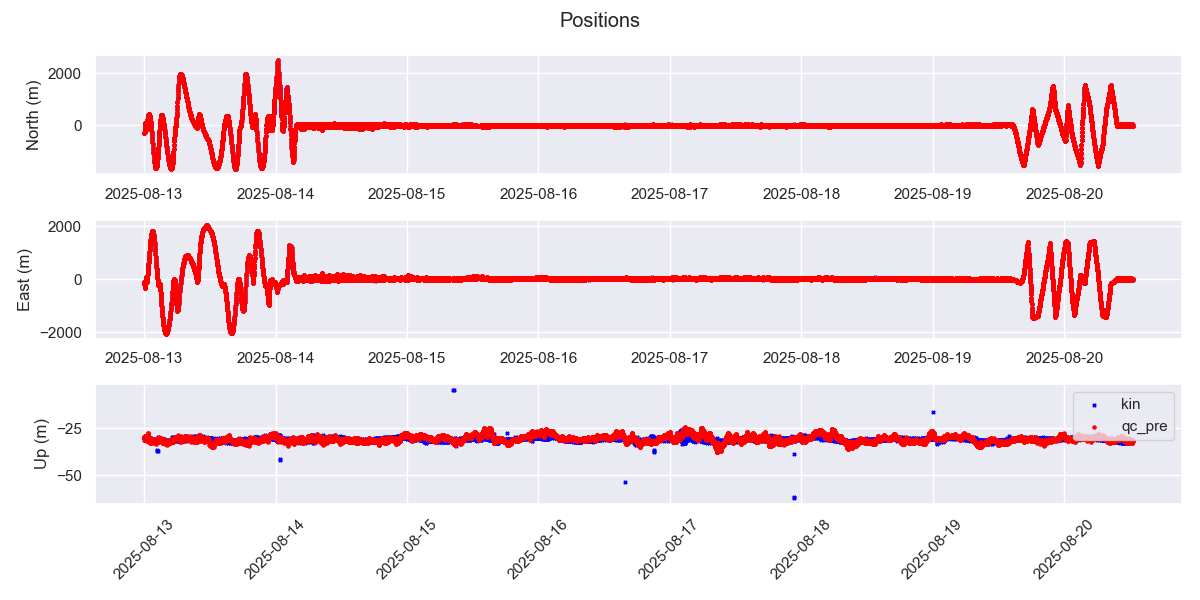

In [31]:
%matplotlib ipympl

s=5
fig, axs = plt.subplots(3, 1, figsize=(12, 6))
axs[0].scatter(kin_df['time'], kin_df['north_m'], label='kin', color='blue', marker='x',s=s)
axs[0].scatter(qc_df.index, qc_df['north1_m'], label='qc_pre', color='red', s=s)
axs[0].set_ylabel('North (m)')

axs[1].scatter(kin_df['time'], kin_df['east_m'], label='kin', color='blue', s=s, marker='x')
axs[1].scatter(qc_df.index, qc_df['east1_m'], label='qc_pre', color='red', s=s)
#axs[1].scatter(shotdata_df_updated.index, shotdata_df_updated['east1'], label='updated', color='green', s=s, marker="+")
axs[1].set_ylabel('East (m)')

axs[2].scatter(kin_df['time'], kin_df['up_m'], label='kin', color='blue', s=s, marker='x')
axs[2].scatter(qc_df.index, qc_df['up1_m'], label='qc_pre', color='red', s=s)
#axs[2].scatter(shotdata_df_updated.index, shotdata_df_updated['up1'], label='updated', color='green', s=s, marker="+")
axs[2].set_ylabel('Up (m)')

fig.suptitle('Positions')
#ax.set_xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()
